# Is my German or American Twitter Network "Happier"?
#### Using sentiment analysis, compare the tweets of German and American Twitter Networks to see which group is more positive (or "happier").

In [1]:
import pandas as pd
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('vader_lexicon') 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re
import string
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
from textblob_de import TextBlobDE
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_palette('Set3')
# sns.set_style("whitegrid")

In [2]:
# import df with tweets from previous notebook:
tweets = pd.read_csv('tweets_to_preprocess_NLP.csv')

In [3]:
tweets.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
tweets.drop('Geocode', axis=1, inplace=True)

In [5]:
tweets.head()

,TweetText,Handle,ID,CreatedAt,Follower,Location,UserDescription,Location_code,Friend,Country
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,1359905846659059713,2021-02-11 16:43:14,Christina Rupp,"Bonn, Deutschland",Project Assistant International Cybersecurity ...,2.0,NaN,Germany
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,1359905846659059713,2021-02-11 16:43:14,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",2.0,NaN,Germany
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,1359101568390414337,2021-02-09 11:27:19,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",2.0,NaN,Germany
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,1359019191358156802,2021-02-09 05:59:59,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",2.0,NaN,Germany
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,1359015354828210176,2021-02-09 05:44:44,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",2.0,NaN,Germany


### Before pre-processing the data for NLP, separate tweet by language:

In [6]:
from langdetect import detect

In [7]:
detect(tweets['TweetText'][0])
# it detects the first tweet as being German

'de'

In [8]:
detect(tweets['TweetText'][1])
# and it detects the second tweet as being English. 

'en'

In [9]:
for index, row in tweets['TweetText'].iteritems():
    try:
        lang = detect(row)
        
    except:
        lang = 0
        
    tweets.loc[index, 'Language'] = lang

In [10]:
tweets['Language'].value_counts()

en    4793
de    3071
0       78
es      67
it      47
nl      37
fr      33
id      28
no      28
af      27
da      24
ro      19
cy      18
fi      17
et      16
tl      15
so      14
pl      13
sv      10
ca      10
pt       9
sw       7
tr       7
ja       6
sq       5
lt       4
sk       4
hu       3
lv       3
sl       3
cs       2
vi       2
hr       2
ru       2
th       1
Name: Language, dtype: int64

In [11]:
tweets.drop(['Friend', 'Location_code'], axis=1, inplace=True)

In [12]:
tweets.head()

,TweetText,Handle,ID,CreatedAt,Follower,Location,UserDescription,Country,Language
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,1359905846659059713,2021-02-11 16:43:14,Christina Rupp,"Bonn, Deutschland",Project Assistant International Cybersecurity ...,Germany,de
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,1359905846659059713,2021-02-11 16:43:14,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,1359101568390414337,2021-02-09 11:27:19,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,1359019191358156802,2021-02-09 05:59:59,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,1359015354828210176,2021-02-09 05:44:44,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de


### Basic Text Cleanup:

Remove RT, Punctuation, etc.

In [13]:
# add new column in df to clean up the texts
tweets['text'] = tweets['TweetText']

In [14]:
tweets['text']

0       RT @z_edian: Unser @snv_berlin Expert:innenwor...
1       RT @rachel_groves: Daily goals: Wake up early....
2       RT @michael_adler_: Fing gut an! Bonn braucht ...
3            RT @EurAsiaBridgeEU: good topic - well done.
4       Gestern haben @Lichtemomente, @askans, @michae...
                              ...                        
8420    RT @jana_hensel: Friedrich Merz hat eine Frau ...
8421    Ich hätte nie gedacht, dass ich das mal sage. ...
8422    RT @Mareicares: Dass da echt eine Frau ihren J...
8423    RT @Nilzenburger: Sich so einen perfiden Begri...
8424    Hat gerade ein Foto gepostet @ Berlin, Germany...
Name: text, Length: 8425, dtype: object

In [15]:
list_tweets = list(tweets['text'])

In [16]:
test= tweets.iloc[0][0]

In [17]:
test

'RT @z_edian: Unser @snv_berlin Expert:innenworkshop zur "staatlichen Beantwortung von böswilligen Cyberaktivitäten" geht langsam zuende.\n\nD…'

In [18]:
remove_rt = lambda x: re.sub('RT @\w+: ', "", x)

In [19]:
lab = lambda x: re.sub('[^äöüÄÖÜA-Za-z ]+','', x)

In [20]:
test1 = remove_rt(test)
test1

'Unser @snv_berlin Expert:innenworkshop zur "staatlichen Beantwortung von böswilligen Cyberaktivitäten" geht langsam zuende.\n\nD…'

In [21]:
test2 = lab(test1)

In [22]:
test2.lower()

'unser snvberlin expertinnenworkshop zur staatlichen beantwortung von böswilligen cyberaktivitäten geht langsam zuended'

In [23]:
# Make this into a function:

def clean_up(x):
    """ Clean up the text before NLP. 
    Remove Punctuation, remove retweet and @.
    Keep German characters as vowels."""
    
    remove_rt = lambda x: re.sub('RT @\w+: ', "", x)
    lab = lambda x: re.sub('[^äöüÄÖÜA-Za-z ]+','', x)
    tw_1 = remove_rt(x)
    tw_2 = lab(tw_1)
    tw_3 =  tw_2.lower()
    
    return tw_3
    

In [24]:
# Test the function with 1 tweet before applying to the column
clean_up('RT @z_edian: Unser @snv_berlin Expert:innenworkshop zur "staatlichen Beantwortung von böswilligen Cyberaktivitäten" geht langsam zuende.\n\nD…')

'unser snvberlin expertinnenworkshop zur staatlichen beantwortung von böswilligen cyberaktivitäten geht langsam zuended'

In [25]:
tweets['text'] = tweets['text'].apply(clean_up)

In [26]:
tweets.head()

,TweetText,Handle,ID,CreatedAt,Follower,Location,UserDescription,Country,Language,text
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,1359905846659059713,2021-02-11 16:43:14,Christina Rupp,"Bonn, Deutschland",Project Assistant International Cybersecurity ...,Germany,de,unser snvberlin expertinnenworkshop zur staatl...
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,1359905846659059713,2021-02-11 16:43:14,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,daily goals wake up early drink coffee work ha...
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,1359101568390414337,2021-02-09 11:27:19,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,fing gut an bonn braucht einen mindshift von d...
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,1359019191358156802,2021-02-09 05:59:59,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,good topic well done
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,1359015354828210176,2021-02-09 05:44:44,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,gestern haben lichtemomente askans michaeladle...


### Tokenization:

In [26]:
def tokenize(x):
    """Tokenize the tweets."""
    
    from nltk.tokenize import word_tokenize
    tokenized_x = word_tokenize(x)
    return tokenized_x

In [27]:
tokenize(tweets['text'][0])

['unser',
 'snvberlin',
 'expertinnenworkshop',
 'zur',
 'staatlichen',
 'beantwortung',
 'von',
 'böswilligen',
 'cyberaktivitäten',
 'geht',
 'langsam',
 'zuended']

In [28]:
tweets['tokenized_tw'] = tweets['text'].apply(tokenize)

In [29]:
tweets.head()

,TweetText,Handle,ID,CreatedAt,Follower,Location,UserDescription,Country,Language,text,tokenized_tw
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,1359905846659059713,2021-02-11 16:43:14,Christina Rupp,"Bonn, Deutschland",Project Assistant International Cybersecurity ...,Germany,de,unser snvberlin expertinnenworkshop zur staatl...,"[unser, snvberlin, expertinnenworkshop, zur, s..."
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,1359905846659059713,2021-02-11 16:43:14,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,daily goals wake up early drink coffee work ha...,"[daily, goals, wake, up, early, drink, coffee,..."
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,1359101568390414337,2021-02-09 11:27:19,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,fing gut an bonn braucht einen mindshift von d...,"[fing, gut, an, bonn, braucht, einen, mindshif..."
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,1359019191358156802,2021-02-09 05:59:59,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,good topic well done,"[good, topic, well, done]"
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,1359015354828210176,2021-02-09 05:44:44,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,gestern haben lichtemomente askans michaeladle...,"[gestern, haben, lichtemomente, askans, michae..."


### Subset in German and English dataframes for the stemming/lemmatizing/vectorizing/analysis:

In [30]:
tweets_en = tweets[tweets['Language']=='en']
tweets_en.shape

(4793, 11)

In [31]:
tweets_de = tweets[tweets['Language']=='de']
tweets_de.shape

(3071, 11)

In [32]:
# So there are now a couple hundred tweets dropped from my analysis since the language was either not detected, or not detected as en/de.

### Stemming and Lemmatization:

In [33]:
def stem_lemmatize_en(l):
    """This function performs both stemming and lemmatization on our english tweets."""
    
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    l = [lemmatizer.lemmatize(item) for item in l]
    from nltk.stem import SnowballStemmer
    stemmer = SnowballStemmer("english")
    l = [stemmer.stem(item) for item in l]
    
    return l 

In [34]:
tweets_en['stem_lemm_tw'] = tweets_en['tokenized_tw'].apply(stem_lemmatize_en)

In [35]:
tweets_en.head()
# Does it actually look like the texts have changed enough from stemming and lemmatization?? 

,TweetText,Handle,ID,CreatedAt,Follower,Location,UserDescription,Country,Language,text,tokenized_tw,stem_lemm_tw
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,1359905846659059713,2021-02-11 16:43:14,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,daily goals wake up early drink coffee work ha...,"[daily, goals, wake, up, early, drink, coffee,...","[daili, goal, wake, up, earli, drink, coffe, w..."
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,1359019191358156802,2021-02-09 05:59:59,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,good topic well done,"[good, topic, well, done]","[good, topic, well, done]"
8,@jpbrice Life is always precious - every singl...,joscchh,1358756115320885248,2021-02-08 12:34:37,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,jpbrice life is always precious every single ...,"[jpbrice, life, is, always, precious, every, s...","[jpbrice, life, is, alway, precious, everi, si..."
11,@PeterShepherd8 @MYorke27 @ZEReadyOregon Great...,joscchh,1356880098310422528,2021-02-03 08:19:59,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,petershepherd myorke zereadyoregon great we h...,"[petershepherd, myorke, zereadyoregon, great, ...","[petershepherd, myork, zereadyoregon, great, w..."
12,RT @jpbrice: “You never know how strong you ar...,joscchh,1355578851544412168,2021-01-30 18:09:18,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,you never know how strong you are until being ...,"[you, never, know, how, strong, you, are, unti...","[you, never, know, how, strong, you, are, unti..."


In [36]:
def stem_lemmatize_de(l):
    """This function performs both stemming and lemmatization on our german tweets."""
    
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    l = [lemmatizer.lemmatize(item) for item in l]
    from nltk.stem import SnowballStemmer
    stemmer = SnowballStemmer("german")
    l = [stemmer.stem(item) for item in l]
    
    return l 

In [37]:
tweets_de['stem_lemm_tw'] = tweets_de['tokenized_tw'].apply(stem_lemmatize_de)
tweets_de.head()

,TweetText,Handle,ID,CreatedAt,Follower,Location,UserDescription,Country,Language,text,tokenized_tw,stem_lemm_tw
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,1359905846659059713,2021-02-11 16:43:14,Christina Rupp,"Bonn, Deutschland",Project Assistant International Cybersecurity ...,Germany,de,unser snvberlin expertinnenworkshop zur staatl...,"[unser, snvberlin, expertinnenworkshop, zur, s...","[uns, snvberlin, expertinnenworkshop, zur, sta..."
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,1359101568390414337,2021-02-09 11:27:19,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,fing gut an bonn braucht einen mindshift von d...,"[fing, gut, an, bonn, braucht, einen, mindshif...","[fing, gut, an, bonn, braucht, ein, mindshift,..."
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,1359015354828210176,2021-02-09 05:44:44,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,gestern haben lichtemomente askans michaeladle...,"[gestern, haben, lichtemomente, askans, michae...","[gest, hab, lichtemoment, askan, michaeladl, b..."
5,@VolkerGoebbels Macht Sinn 😏,joscchh,1358806042960932869,2021-02-08 15:53:00,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,volkergoebbels macht sinn,"[volkergoebbels, macht, sinn]","[volkergoebbel, macht, sinn]"
6,@jbrunotte Was waren denn deine Beweggründe da...,joscchh,1358758503419162624,2021-02-08 12:44:06,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,jbrunotte was waren denn deine beweggründe daf...,"[jbrunotte, was, waren, denn, deine, beweggrün...","[jbrunott, wa, war, denn, dein, beweggrund, da..."


### Stopwords Removal:

In [38]:
def remove_stopwords_en(l):
    """Remove english stopwords from a list of tweets."""
    
    from nltk.corpus import stopwords
    stopwords_list = stopwords.words("english")
    l = [item for item in l if not item in stopwords_list]
    
    return l

In [39]:
tweets_en['remove_stopwords_tw'] = tweets_en['stem_lemm_tw'].apply(remove_stopwords_en)
tweets_en.head()

,TweetText,Handle,ID,CreatedAt,Follower,Location,UserDescription,Country,Language,text,tokenized_tw,stem_lemm_tw,remove_stopwords_tw
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,1359905846659059713,2021-02-11 16:43:14,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,daily goals wake up early drink coffee work ha...,"[daily, goals, wake, up, early, drink, coffee,...","[daili, goal, wake, up, earli, drink, coffe, w...","[daili, goal, wake, earli, drink, coffe, work,..."
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,1359019191358156802,2021-02-09 05:59:59,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,good topic well done,"[good, topic, well, done]","[good, topic, well, done]","[good, topic, well, done]"
8,@jpbrice Life is always precious - every singl...,joscchh,1358756115320885248,2021-02-08 12:34:37,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,jpbrice life is always precious every single ...,"[jpbrice, life, is, always, precious, every, s...","[jpbrice, life, is, alway, precious, everi, si...","[jpbrice, life, alway, precious, everi, singl,..."
11,@PeterShepherd8 @MYorke27 @ZEReadyOregon Great...,joscchh,1356880098310422528,2021-02-03 08:19:59,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,petershepherd myorke zereadyoregon great we h...,"[petershepherd, myorke, zereadyoregon, great, ...","[petershepherd, myork, zereadyoregon, great, w...","[petershepherd, myork, zereadyoregon, great, l..."
12,RT @jpbrice: “You never know how strong you ar...,joscchh,1355578851544412168,2021-01-30 18:09:18,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,en,you never know how strong you are until being ...,"[you, never, know, how, strong, you, are, unti...","[you, never, know, how, strong, you, are, unti...","[never, know, strong, strong, onli, choic, quo..."


In [40]:
def remove_stopwords_de(l):
    """Remove german stopwords from a list of tweets."""
    
    from nltk.corpus import stopwords
    stopwords_list = stopwords.words("german")
    l = [item for item in l if not item in stopwords_list]
    
    return l

In [41]:
tweets_de['remove_stopwords_tw'] = tweets_de['stem_lemm_tw'].apply(remove_stopwords_de)
tweets_de.head()

,TweetText,Handle,ID,CreatedAt,Follower,Location,UserDescription,Country,Language,text,tokenized_tw,stem_lemm_tw,remove_stopwords_tw
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,1359905846659059713,2021-02-11 16:43:14,Christina Rupp,"Bonn, Deutschland",Project Assistant International Cybersecurity ...,Germany,de,unser snvberlin expertinnenworkshop zur staatl...,"[unser, snvberlin, expertinnenworkshop, zur, s...","[uns, snvberlin, expertinnenworkshop, zur, sta...","[snvberlin, expertinnenworkshop, staatlich, be..."
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,1359101568390414337,2021-02-09 11:27:19,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,fing gut an bonn braucht einen mindshift von d...,"[fing, gut, an, bonn, braucht, einen, mindshif...","[fing, gut, an, bonn, braucht, ein, mindshift,...","[fing, gut, bonn, braucht, mindshift, autostad..."
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,1359015354828210176,2021-02-09 05:44:44,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,gestern haben lichtemomente askans michaeladle...,"[gestern, haben, lichtemomente, askans, michae...","[gest, hab, lichtemoment, askan, michaeladl, b...","[gest, lichtemoment, askan, michaeladl, barbar..."
5,@VolkerGoebbels Macht Sinn 😏,joscchh,1358806042960932869,2021-02-08 15:53:00,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,volkergoebbels macht sinn,"[volkergoebbels, macht, sinn]","[volkergoebbel, macht, sinn]","[volkergoebbel, macht, sinn]"
6,@jbrunotte Was waren denn deine Beweggründe da...,joscchh,1358758503419162624,2021-02-08 12:44:06,Johanna Schäfer,"Bonn, Deutschland","CEO @BonnLAB, urban developer & #SocialMedia e...",Germany,de,jbrunotte was waren denn deine beweggründe daf...,"[jbrunotte, was, waren, denn, deine, beweggrün...","[jbrunott, wa, war, denn, dein, beweggrund, da...","[jbrunott, wa, beweggrund, dafur, spannend, wiss]"


### Remove intermediary processing steps from dfs:

In [42]:
tweets_en.drop(['tokenized_tw', 'stem_lemm_tw', 'text', 'UserDescription', 'CreatedAt', 'ID', 'Follower'], axis=1, inplace=True)
tweets_en.rename(columns={'remove_stopwords_tw': 'text_processed'}, inplace=True)
tweets_en.head()

,TweetText,Handle,Location,Country,Language,text_processed
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,"Bonn, Deutschland",Germany,en,"[daili, goal, wake, earli, drink, coffe, work,..."
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,"Bonn, Deutschland",Germany,en,"[good, topic, well, done]"
8,@jpbrice Life is always precious - every singl...,joscchh,"Bonn, Deutschland",Germany,en,"[jpbrice, life, alway, precious, everi, singl,..."
11,@PeterShepherd8 @MYorke27 @ZEReadyOregon Great...,joscchh,"Bonn, Deutschland",Germany,en,"[petershepherd, myork, zereadyoregon, great, l..."
12,RT @jpbrice: “You never know how strong you ar...,joscchh,"Bonn, Deutschland",Germany,en,"[never, know, strong, strong, onli, choic, quo..."


In [43]:
tweets_de.drop(['tokenized_tw', 'stem_lemm_tw', 'text', 'UserDescription', 'CreatedAt', 'ID', 'Follower'], axis=1, inplace=True)
tweets_de.rename(columns={'remove_stopwords_tw': 'text_processed'}, inplace=True)
tweets_de.head()

,TweetText,Handle,Location,Country,Language,text_processed
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,"Bonn, Deutschland",Germany,de,"[snvberlin, expertinnenworkshop, staatlich, be..."
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,"Bonn, Deutschland",Germany,de,"[fing, gut, bonn, braucht, mindshift, autostad..."
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,"Bonn, Deutschland",Germany,de,"[gest, lichtemoment, askan, michaeladl, barbar..."
5,@VolkerGoebbels Macht Sinn 😏,joscchh,"Bonn, Deutschland",Germany,de,"[volkergoebbel, macht, sinn]"
6,@jbrunotte Was waren denn deine Beweggründe da...,joscchh,"Bonn, Deutschland",Germany,de,"[jbrunott, wa, beweggrund, dafur, spannend, wiss]"


### Sentiment Analysis:
Calculating Negative, Positive, and/or Neutral Values.
* REMEMBER - the tweets in tweets_en means that they are English-language tweets, NOT that they come from my American network. 
* REMEMBER - the tweets in tweets_de means that they are German-language tweets, NOT that they come from my German network.

#### Using Python package TextBlob to calculate polarity values of individual tweets:

In [44]:
sentiment_objects_en = [TextBlob(tweet) for tweet in tweets_en['TweetText']]

sentiment_objects_en[0].polarity, sentiment_objects_en[0]

(0.19404761904761905,
 TextBlob("RT @rachel_groves: Daily goals: Wake up early. Drink coffee. Work hard. Be ambitious. Do what you love. Love what you do. Have fun. #inspir…"))

In [45]:
# Add polarity column to the dataframes:

tweets_en['Polarity'] = [i.polarity for i in sentiment_objects_en]
tweets_en.head()

,TweetText,Handle,Location,Country,Language,text_processed,Polarity
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,"Bonn, Deutschland",Germany,en,"[daili, goal, wake, earli, drink, coffe, work,...",0.194048
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,"Bonn, Deutschland",Germany,en,"[good, topic, well, done]",0.700000
8,@jpbrice Life is always precious - every singl...,joscchh,"Bonn, Deutschland",Germany,en,"[jpbrice, life, alway, precious, everi, singl,...",0.272381
11,@PeterShepherd8 @MYorke27 @ZEReadyOregon Great...,joscchh,"Bonn, Deutschland",Germany,en,"[petershepherd, myork, zereadyoregon, great, l...",0.200000
12,RT @jpbrice: “You never know how strong you ar...,joscchh,"Bonn, Deutschland",Germany,en,"[never, know, strong, strong, onli, choic, quo...",0.288889


In [46]:
sentiment_objects_de = [TextBlobDE(tweet) for tweet in tweets_de['TweetText']]

sentiment_objects_de[0].polarity, sentiment_objects_de[0]

(-0.35,
 TextBlobDE("RT @z_edian: Unser @snv_berlin Expert:innenworkshop zur "staatlichen Beantwortung von böswilligen Cyberaktivitäten" geht langsam zuende.
 
 D…"))

In [47]:
tweets_de['Polarity'] = [i.polarity for i in sentiment_objects_de]
tweets_de.head()

,TweetText,Handle,Location,Country,Language,text_processed,Polarity
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,"Bonn, Deutschland",Germany,de,"[snvberlin, expertinnenworkshop, staatlich, be...",-0.350000
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,"Bonn, Deutschland",Germany,de,"[fing, gut, bonn, braucht, mindshift, autostad...",0.250000
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,"Bonn, Deutschland",Germany,de,"[gest, lichtemoment, askan, michaeladl, barbar...",0.000000
5,@VolkerGoebbels Macht Sinn 😏,joscchh,"Bonn, Deutschland",Germany,de,"[volkergoebbel, macht, sinn]",0.000000
6,@jbrunotte Was waren denn deine Beweggründe da...,joscchh,"Bonn, Deutschland",Germany,de,"[jbrunott, wa, beweggrund, dafur, spannend, wiss]",0.233333


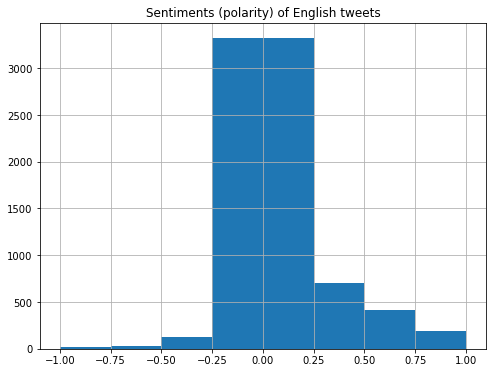

In [48]:
# Plot histogram of polarity values:

fig, ax = plt.subplots(figsize=(8,6))
tweets_en['Polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], 
                          ax=ax)
plt.title("Sentiments (polarity) of English tweets")
plt.show()

# why doesnt the title show up?

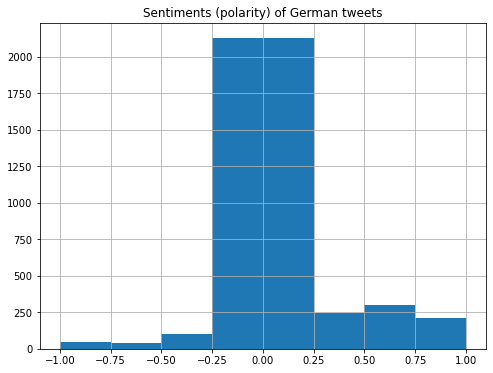

In [49]:
fig, ax = plt.subplots(figsize=(8,6))

tweets_de['Polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], 
                          ax=ax)
plt.title("Sentiments (polarity) of German tweets")
plt.show()

# why doesnt the title show up?

### Add polarity column to df of all tweets and plot polarity by location rather than language.

#### Using Python package TextBlob to calculate sentiment (pos/neg) values of individual tweets:

TextBlob sentiment returns polarity score and subjectivity score. 
If polarity > 0, it is considered positive, if  polarity < 0, it is considered negative.

In [50]:
sentiment_objects_en = [TextBlob(tweet) for tweet in tweets_en['TweetText']]

sentiment_objects_en[0].sentiment, sentiment_objects_en[0]

(Sentiment(polarity=0.19404761904761905, subjectivity=0.42738095238095236),
 TextBlob("RT @rachel_groves: Daily goals: Wake up early. Drink coffee. Work hard. Be ambitious. Do what you love. Love what you do. Have fun. #inspir…"))

In [51]:
## Add column w. subjectivity score to each df
tweets_en['Subjectivity'] = [i.sentiment[1] for i in sentiment_objects_en]
tweets_en.head()

,TweetText,Handle,Location,Country,Language,text_processed,Polarity,Subjectivity
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,"Bonn, Deutschland",Germany,en,"[daili, goal, wake, earli, drink, coffe, work,...",0.194048,0.427381
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,"Bonn, Deutschland",Germany,en,"[good, topic, well, done]",0.700000,0.600000
8,@jpbrice Life is always precious - every singl...,joscchh,"Bonn, Deutschland",Germany,en,"[jpbrice, life, alway, precious, everi, singl,...",0.272381,0.609524
11,@PeterShepherd8 @MYorke27 @ZEReadyOregon Great...,joscchh,"Bonn, Deutschland",Germany,en,"[petershepherd, myork, zereadyoregon, great, l...",0.200000,0.385417
12,RT @jpbrice: “You never know how strong you ar...,joscchh,"Bonn, Deutschland",Germany,en,"[never, know, strong, strong, onli, choic, quo...",0.288889,0.822222


In [52]:
tweets_de['Subjectivity'] = [i.sentiment[1] for i in sentiment_objects_de]
tweets_de.head()

,TweetText,Handle,Location,Country,Language,text_processed,Polarity,Subjectivity
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,"Bonn, Deutschland",Germany,de,"[snvberlin, expertinnenworkshop, staatlich, be...",-0.350000,0.00
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,"Bonn, Deutschland",Germany,de,"[fing, gut, bonn, braucht, mindshift, autostad...",0.250000,0.25
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,"Bonn, Deutschland",Germany,de,"[gest, lichtemoment, askan, michaeladl, barbar...",0.000000,0.00
5,@VolkerGoebbels Macht Sinn 😏,joscchh,"Bonn, Deutschland",Germany,de,"[volkergoebbel, macht, sinn]",0.000000,0.00
6,@jbrunotte Was waren denn deine Beweggründe da...,joscchh,"Bonn, Deutschland",Germany,de,"[jbrunott, wa, beweggrund, dafur, spannend, wiss]",0.233333,0.00


#### Add column with sentiment (pos/neg/neu)

In [53]:
sentiment_category_en = ['positive' if score >0
                         else 'negative' if score<0
                             else 'neutral'
                                  for score in tweets_en['Polarity']]

In [54]:
sentiment_category_en[:20] 
# Make sure it worked, then add to df

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative']

In [55]:
tweets_en['Sentiment'] = sentiment_category_en

In [56]:
tweets_en.head()

,TweetText,Handle,Location,Country,Language,text_processed,Polarity,Subjectivity,Sentiment
1,RT @rachel_groves: Daily goals: Wake up early....,joscchh,"Bonn, Deutschland",Germany,en,"[daili, goal, wake, earli, drink, coffe, work,...",0.194048,0.427381,positive
3,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,"Bonn, Deutschland",Germany,en,"[good, topic, well, done]",0.700000,0.600000,positive
8,@jpbrice Life is always precious - every singl...,joscchh,"Bonn, Deutschland",Germany,en,"[jpbrice, life, alway, precious, everi, singl,...",0.272381,0.609524,positive
11,@PeterShepherd8 @MYorke27 @ZEReadyOregon Great...,joscchh,"Bonn, Deutschland",Germany,en,"[petershepherd, myork, zereadyoregon, great, l...",0.200000,0.385417,positive
12,RT @jpbrice: “You never know how strong you ar...,joscchh,"Bonn, Deutschland",Germany,en,"[never, know, strong, strong, onli, choic, quo...",0.288889,0.822222,positive


In [57]:
sentiment_category_de = ['positive' if score >0
                         else 'negative' if score<0
                             else 'neutral'
                                  for score in tweets_de['Polarity']]

In [58]:
sentiment_category_de[:20] 
# Make sure it worked, then add to df

['negative',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral']

In [59]:
tweets_de['Sentiment'] = sentiment_category_de

In [60]:
tweets_de.head()

,TweetText,Handle,Location,Country,Language,text_processed,Polarity,Subjectivity,Sentiment
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,christinacrupp,"Bonn, Deutschland",Germany,de,"[snvberlin, expertinnenworkshop, staatlich, be...",-0.350000,0.00,negative
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,joscchh,"Bonn, Deutschland",Germany,de,"[fing, gut, bonn, braucht, mindshift, autostad...",0.250000,0.25,positive
4,"Gestern haben @Lichtemomente, @askans, @michae...",joscchh,"Bonn, Deutschland",Germany,de,"[gest, lichtemoment, askan, michaeladl, barbar...",0.000000,0.00,neutral
5,@VolkerGoebbels Macht Sinn 😏,joscchh,"Bonn, Deutschland",Germany,de,"[volkergoebbel, macht, sinn]",0.000000,0.00,neutral
6,@jbrunotte Was waren denn deine Beweggründe da...,joscchh,"Bonn, Deutschland",Germany,de,"[jbrunott, wa, beweggrund, dafur, spannend, wiss]",0.233333,0.00,positive


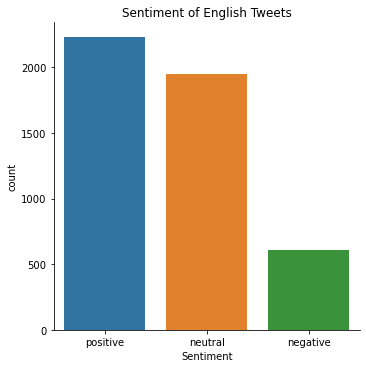

In [61]:
sns.catplot(x='Sentiment', kind='count', data=tweets_en)
plt.title('Sentiment of English Tweets')
plt.show()

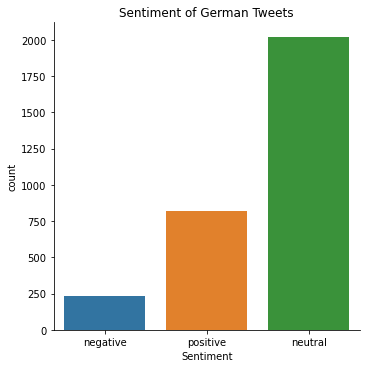

In [62]:
sns.catplot(x='Sentiment', kind='count', data=tweets_de)
plt.title('Sentiment of German Tweets')
plt.show()

### Re-merge tweets_de and tweets_en dataframes to visualize by LOCATION rather than language. 

In [63]:
print(len(tweets_en))
print(len(tweets_de))

# Save both en/de dataframes to csv for wordcloud in separate analysis:
tweets_en.to_csv('tweets_en.csv')
tweets_de.to_csv('tweets_de.csv')

4793
3071


In [64]:
tweets_analysis = pd.concat([tweets_en, tweets_de], ignore_index=True)
tweets_analysis.head()

,TweetText,Handle,Location,Country,Language,text_processed,Polarity,Subjectivity,Sentiment
0,RT @rachel_groves: Daily goals: Wake up early....,joscchh,"Bonn, Deutschland",Germany,en,"[daili, goal, wake, earli, drink, coffe, work,...",0.194048,0.427381,positive
1,RT @EurAsiaBridgeEU: good topic - well done.,joscchh,"Bonn, Deutschland",Germany,en,"[good, topic, well, done]",0.700000,0.600000,positive
2,@jpbrice Life is always precious - every singl...,joscchh,"Bonn, Deutschland",Germany,en,"[jpbrice, life, alway, precious, everi, singl,...",0.272381,0.609524,positive
3,@PeterShepherd8 @MYorke27 @ZEReadyOregon Great...,joscchh,"Bonn, Deutschland",Germany,en,"[petershepherd, myork, zereadyoregon, great, l...",0.200000,0.385417,positive
4,RT @jpbrice: “You never know how strong you ar...,joscchh,"Bonn, Deutschland",Germany,en,"[never, know, strong, strong, onli, choic, quo...",0.288889,0.822222,positive


In [65]:
# save df to csv:

tweets_analysis.to_csv('tweets_analysis.csv')

In [66]:
tweets_analysis['Country'].value_counts()

Germany    5658
USA        2206
Name: Country, dtype: int64

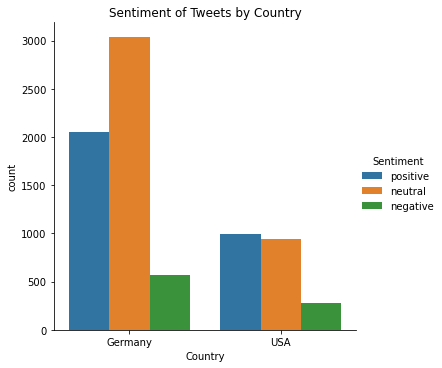

In [67]:
sns.catplot(x='Country', kind='count', hue='Sentiment', data=tweets_analysis)
plt.title('Sentiment of Tweets by Country')
plt.show()

In [68]:
#### Since absolute numbers aren't telling, maybe look at ratio of positive:total tweets.

In [80]:
# Get length of German-region tweets for ratio:

ger = tweets_analysis[tweets_analysis['Country']=='Germany']
print("Tweets from German Network: ", len(ger))

usa = tweets_analysis[tweets_analysis['Country']=='USA']
print("Tweets from American Network: ", len(usa))

Tweets from German Network:  5658
Tweets from American Network:  2206


In [83]:
ratio_us_pos = len(tweets_analysis[(tweets_analysis['Country']=='USA') & (tweets_analysis['Sentiment']=='positive')])/len(usa)
ratio_us_pos

0.4501359927470535

In [84]:
ratio_de_pos = len(tweets_analysis[(tweets_analysis['Country']=='Germany') & (tweets_analysis['Sentiment']=='positive')])/len(ger)
ratio_de_pos

0.3633792859667727

# RETURN TO HERE:

Although the graphs of all tweets make it seem that German Network is more positive, the ratio of positive tweets: all tweets in the US is 10% higher!

Get the predict_proba probability from TextBlob next!

In [69]:
# Try Groupby country:
tweets_analysis.groupby(['Country']).mean()

,Polarity,Subjectivity
Country,,
Germany,0.121339,0.184299
USA,0.130916,0.329267


In [70]:
grouped_country = tweets_analysis.groupby(['Country', 'Sentiment']).mean()
grouped_country

Polarity  Subjectivity
Country Sentiment                        
Germany negative  -0.327023      0.280761
        neutral    0.000000      0.061108
        positive   0.423944      0.339655
USA     negative  -0.249778      0.472389
        neutral    0.000000      0.075677
        positive   0.360261      0.528775

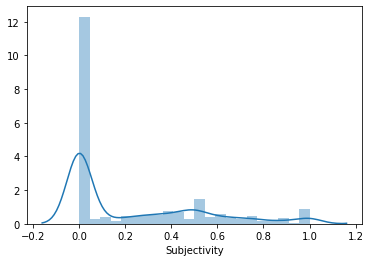

In [71]:
sns.distplot(tweets_analysis['Subjectivity'])
# Somehow exclude values of 0 from the graph

In [72]:
# Try different seaborn palette: Set3, YlGnBu, bwr_r, cool, hsv, seismic_r, winter, winter_r, Accent_r

In [186]:
sns.distplot?